<h1>2022.05.12. 강의 시간내 실습</h1>

In [125]:
import pandas as pd
import numpy as np

car_data = pd.read_csv("C:/ai_dataset/car.data")

In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in car_data.columns :
    car_data[i] = le.fit_transform(car_data[i])

In [127]:
car_data.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.00000,1727.000000
mean,1.499131,1.499131,1.500869,1.000579,0.999421,1.00000,1.552982
std,1.118098,1.118098,1.118098,0.816615,0.816615,0.81697,0.876136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.500000,0.500000,1.000000,0.000000,0.000000,0.00000,1.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,2.000000
75%,2.000000,2.000000,2.500000,2.000000,2.000000,2.00000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000,3.000000


In [128]:
car_data.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

Text(0.5, 1.0, 'Class')

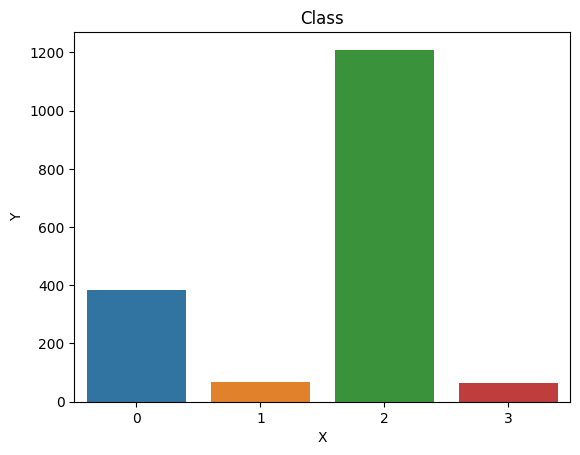

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = car_data, x="unacc")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Class")

In [130]:
x = car_data.drop('unacc',axis=1)
y = car_data.unacc.values

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [132]:
from keras import models
from keras import layers
from keras.optimizers import Adam

def build_model(): 
    model = models.Sequential()
    
    model.add(layers.Dense(64, activation='relu', input_shape=(6,)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    
    return model

In [133]:
model = build_model() 

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                448       
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 4)                 68        
                                                                 
Total params: 3,124
Trainable params: 3,124
Non-trainable params: 0
_________________________________________________________________


c:\Users\kkh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [134]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [135]:
model_history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.2)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test_one_hot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
18/18 [==============================] - 0s 10ms/step - loss: 1.0404 - accuracy: 0.4755 - val_loss: 0.9025 - val_accuracy: 0.6751
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.8081 - accuracy: 0.7111 - val_loss: 0.8863 - val_accuracy: 0.6751
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7618 - accuracy: 0.7111 - val_loss: 0.8283 - val_accuracy: 0.6751
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7218 - accuracy: 0.7111 - val_loss: 0.7861 - val_accuracy: 0.6751
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.7111 - val_loss: 0.7520 - val_accuracy: 0.6751
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.7101 - val_loss: 0.7236 - val_accuracy: 0.6859
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.7092 - val_loss: 0.7046 - val_accuracy: 0.6931
Epoch 8/100


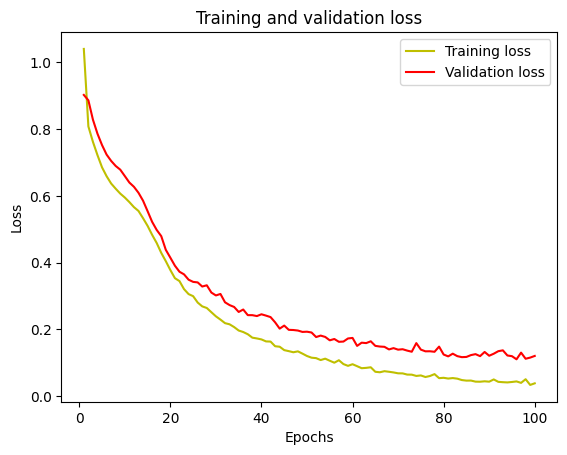

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

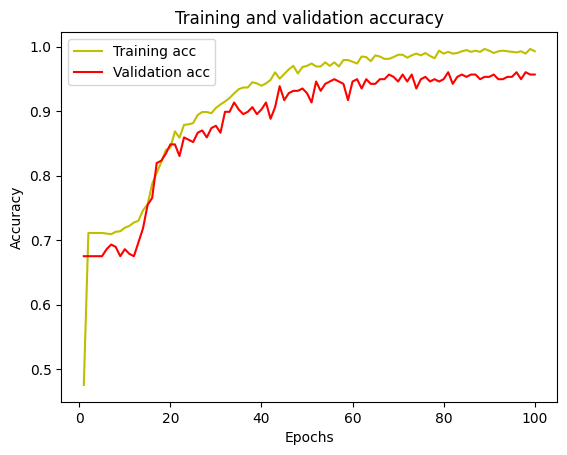

In [137]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [138]:
from sklearn.metrics import f1_score, classification_report

f1 = f1_score(y_test_class, y_pred_class, average='weighted')
print("F1 score:", f1)

report = classification_report(y_test_class, y_pred_class)
print("Classification report:\n", report)

F1 score: 0.9476666011419084
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        77
           1       0.88      0.47      0.61        15
           2       0.99      1.00      0.99       237
           3       0.72      0.76      0.74        17

    accuracy                           0.95       346
   macro avg       0.87      0.79      0.82       346
weighted avg       0.95      0.95      0.95       346



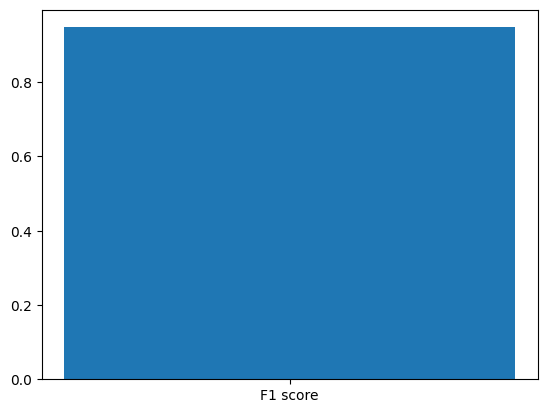

In [139]:
import matplotlib.pyplot as plt

metrics = {'F1 score': f1}
plt.bar(metrics.keys(), metrics.values())
plt.show()